In [1]:
import numpy as np
from keras import models
from keras import layers
from keras import optimizers
from keras.datasets import imdb
from keras import losses
from keras import metrics

def vectorize_sequences(sequences, dimension=10000):
    """
    对句子中的词进行打标，在词典中的词为1否则为0，限定句长向量长度为dimension
    :param sequences:
    :param dimension:
    :return:
    """
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

Using TensorFlow backend.


In [4]:
 # 数据集:imdb评论语句
    #   sequences: 每句中的词已其出现频率排行为编号标号，限定前10000个词，不再范围内的句中标为0
    #   label: 评论感情 0：负情感、1：正情感
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)



1646592/1641221 [==============================] - 7s 5us/step


In [6]:
# key：词频率排号 value：词
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [7]:
# 处理sequences
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
# 建立模型pipline
model = models.Sequential()

model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
              loss=losses.binary_crossentropy,
              metrics=[metrics.binary_accuracy])

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
# 训练集
partial_x_train = x_train[10000:]
partial_y_train = y_train[10000:]
# 验证集
x_val = x_train[:10000]
y_val = y_train[:10000]

# 训练
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 47s 3ms/step - loss: 0.5087 - acc: 0.7807 - val_loss: 0.3794 - val_acc: 0.8695
Epoch 2/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.3006 - acc: 0.9055 - val_loss: 0.3003 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.2180 - acc: 0.9283 - val_loss: 0.3081 - val_acc: 0.8715
Epoch 4/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.1750 - acc: 0.9436 - val_loss: 0.2838 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.1425 - acc: 0.9545 - val_loss: 0.2848 - val_acc: 0.8863
Epoch 6/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.1148 - acc: 0.9654 - val_loss: 0.3146 - val_acc: 0.8776
Epoch 7/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.0978 - acc: 0.9706 - val_loss: 0.3130 - v

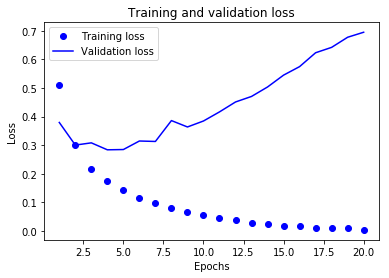

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

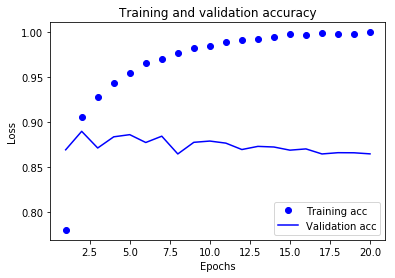

In [14]:
#plt.clf() # clear figure
acc_values = history.history['acc']
val_acc_values = history.history['val_acc'] 
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [15]:
 # 模型预测
model.predict(x_test)

array([[ 0.00772085],
       [ 0.99999988],
       [ 0.96897817],
       ..., 
       [ 0.00200792],
       [ 0.00676513],
       [ 0.57491273]], dtype=float32)